In [76]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import json
import os
import numpy as np

The goal of this notebook is to load the character data and connect it to the movie metadata and visualize character complexity of women in the past and present.

## Movie Metadata
Metadata for 81,741 movies, extracted from the Noverber 4, 2012 dump of Freebase.  Tab-separated; columns:

1. Wikipedia movie ID
2. Freebase movie ID
3. Movie name
4. Movie release date
5. Movie box office revenue
6. Movie runtime
7. Movie languages (Freebase ID:name tuples)
8. Movie countries (Freebase ID:name tuples)
9. Movie genres (Freebase ID:name tuples)

In [2]:
header = ['wikipedia_movie_id',
          'freebase_movie_id',
          'movie_name',
          'movie_release_date',
          'movie_box_office_revenue',
          'movie_runtime',
          'movie_languages',
          'movie_countries',
          'movie_genres']
movie_df = pd.read_csv('../dataset/movie.metadata.tsv', sep='\t', names=header)
# index by wikipedia_movie_id
movie_df.set_index('wikipedia_movie_id', inplace=True)
display(movie_df.head())
movie_df.info()


,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres
wikipedia_movie_id,,,,,,,,
975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


<class 'pandas.core.frame.DataFrame'>
Int64Index: 81741 entries, 975900 to 12476867
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   freebase_movie_id         81741 non-null  object 
 1   movie_name                81741 non-null  object 
 2   movie_release_date        74839 non-null  object 
 3   movie_box_office_revenue  8401 non-null   float64
 4   movie_runtime             61291 non-null  float64
 5   movie_languages           81741 non-null  object 
 6   movie_countries           81741 non-null  object 
 7   movie_genres              81741 non-null  object 
dtypes: float64(2), object(6)
memory usage: 5.6+ MB


## Character Metadata
Metadata for 450,669 characters aligned to the movies above, extracted from the Noverber 4, 2012 dump of Freebase.  Tab-separated; columns:

1. Wikipedia movie ID
2. Freebase movie ID
3. Movie release date
4. Character name
5. Actor date of birth
6. Actor gender
7. Actor height (in meters)
8. Actor ethnicity (Freebase ID)
9. Actor name
10. Actor age at movie release
11. Freebase character/actor map ID
12. Freebase character ID
13. Freebase actor ID


In [3]:
header = ['wikipedia_movie_id', 'freebase_movie_id', 'movie_release_date', 'character_name', 'actor_date_of_birth',
          'actor_gender', 'actor_height', 'actor_ethnicity', 'actor_name', 'actor_age_at_release',
          'freebase_character_actor_map_id', 'freebase_character_id', 'freebase_actor_id']
character_df = pd.read_csv('../dataset/character.metadata.tsv', sep='\t', names=header)
character_df.head()

,wikipedia_movie_id,freebase_movie_id,movie_release_date,character_name,actor_date_of_birth,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age_at_release,freebase_character_actor_map_id,freebase_character_id,freebase_actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


## Extracted Character Data from NLP

In [4]:
# movies = {
#     'id': {
#         'characters': {
#             'name': {
#                 {
#                     'occurrences': int,
#                     'actions_taken': list,
#                     'actions_received': list,
#                     'possessions': list,
#                     'descriptions': list
#                 }
#             }
#         }
#     }
# }

In [5]:
directory = '../dataset/characters/'
movies = {}
is_in_data = 0
files = os.listdir(directory)
for file in tqdm(files):
    #extract movie id (file name)
    movie_id = file.split('.')[0]
    
    if int(movie_id) in movie_df.index:
        is_in_data += 1
    
    with open(directory + file) as f:
        data = json.load(f)
        movies[movie_id] = data
print('processed movies found in movie metadata: ', is_in_data)

100%|██████████| 42306/42306 [00:05<00:00, 7101.52it/s]

processed movies found in movie metadata:  42207


In [61]:
# create a dataframe from the movies dictionary
movie_ids = []
character_names = []
character_occurrences = []
character_actions_taken = []
character_actions_received = []
character_possessions = []
character_descriptions = []
for movie_id, movie in tqdm(movies.items()):
    normalized_occurrences = []
    for character_name, character in movie.items():
        movie_ids.append(movie_id)
        character_names.append(character_name)
        normalized_occurrences.append(character['occurrences'])
        character_actions_taken.append(character['actions_taken'])
        character_actions_received.append(character['actions_received'])
        character_possessions.append(character['possessions'])
        character_descriptions.append(character['descriptions'])
    #append all
    character_occurrences.extend((np.array(normalized_occurrences)/sum(normalized_occurrences)).tolist())

100%|██████████| 42306/42306 [00:00<00:00, 256798.58it/s]


In [62]:
character_nlp_data = {
    'wikipedia_movie_id': movie_ids,
    'character_name': character_names,
    'character_occurrences': character_occurrences,
    'character_actions_taken': character_actions_taken,
    'character_actions_received': character_actions_received,
    'character_possessions': character_possessions,
    'character_descriptions': character_descriptions
}
nlp_df = pd.DataFrame(character_nlp_data)
# wikipedia_movie_id to int64
nlp_df['wikipedia_movie_id'] = nlp_df['wikipedia_movie_id'].astype('int64')
# set index to wikipedia_movie_id
nlp_df.set_index('wikipedia_movie_id', inplace=True)
nlp_df.head()
nlp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285319 entries, 34195696 to 3675194
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   character_name              285319 non-null  object 
 1   character_occurrences       285319 non-null  float64
 2   character_actions_taken     285319 non-null  object 
 3   character_actions_received  285319 non-null  object 
 4   character_possessions       285319 non-null  object 
 5   character_descriptions      285319 non-null  object 
dtypes: float64(1), object(5)
memory usage: 15.2+ MB


notes: some names are just part of the whole name. will use `includes` for now to pair them

In [136]:
# join nlp dataframe with movie and character dataframe on wikipedia_movie_id
df_joined = nlp_df.join(movie_df,'wikipedia_movie_id',how='left',lsuffix='_nlp')
df_joined = character_df.join(df_joined, on=['wikipedia_movie_id'], how='left', lsuffix='_nlp', rsuffix='')

df_joined.info()
df_joined.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2747487 entries, 0 to 450668
Data columns (total 27 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   wikipedia_movie_id               int64  
 1   freebase_movie_id_nlp            object 
 2   movie_release_date_nlp           object 
 3   character_name_nlp               object 
 4   actor_date_of_birth              object 
 5   actor_gender                     object 
 6   actor_height                     float64
 7   actor_ethnicity                  object 
 8   actor_name                       object 
 9   actor_age_at_release             float64
 10  freebase_character_actor_map_id  object 
 11  freebase_character_id            object 
 12  freebase_actor_id                object 
 13  character_name                   object 
 14  character_occurrences            float64
 15  character_actions_taken          object 
 16  character_actions_received       object 
 17  character

,wikipedia_movie_id,freebase_movie_id_nlp,movie_release_date_nlp,character_name_nlp,actor_date_of_birth,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age_at_release,...,character_possessions,character_descriptions,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,NaN,Wanda De Jesus,42.0,...,[],[],/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,NaN,Wanda De Jesus,42.0,...,[crew],[police],/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,NaN,Wanda De Jesus,42.0,...,[],[Desolation],/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,NaN,Wanda De Jesus,42.0,...,[],[],/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,NaN,Wanda De Jesus,42.0,...,"[intention, cot, report, superior]",[],/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."


In [137]:
# drop nan values
df_joined.dropna(subset=['character_name','character_name_nlp'], inplace=True)
df_joined.info()
df_joined.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1369971 entries, 0 to 450665
Data columns (total 27 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   wikipedia_movie_id               1369971 non-null  int64  
 1   freebase_movie_id_nlp            1369971 non-null  object 
 2   movie_release_date_nlp           1362483 non-null  object 
 3   character_name_nlp               1369971 non-null  object 
 4   actor_date_of_birth              1145821 non-null  object 
 5   actor_gender                     1321890 non-null  object 
 6   actor_height                     763067 non-null   float64
 7   actor_ethnicity                  531687 non-null   object 
 8   actor_name                       1367186 non-null  object 
 9   actor_age_at_release             1079305 non-null  float64
 10  freebase_character_actor_map_id  1369971 non-null  object 
 11  freebase_character_id            1369971 non-null  

,wikipedia_movie_id,freebase_movie_id_nlp,movie_release_date_nlp,character_name_nlp,actor_date_of_birth,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age_at_release,...,character_possessions,character_descriptions,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,NaN,Wanda De Jesus,42.0,...,[],[],/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,NaN,Wanda De Jesus,42.0,...,[crew],[police],/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,NaN,Wanda De Jesus,42.0,...,[],[Desolation],/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,NaN,Wanda De Jesus,42.0,...,[],[],/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,NaN,Wanda De Jesus,42.0,...,"[intention, cot, report, superior]",[],/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."


In [141]:
# drop rows where character_name_nlp is not contained in character_name
# Drop rows where character_name_nlp is not contained in character_name
df_joined = df_joined[df_joined.apply(lambda row: row['character_name_nlp'] in row['character_name'], axis=1)]

# Print characters where character_name is longer than character_name_nlp
df_filtered = df_joined[df_joined.apply(lambda row: len(row['character_name']) > len(row['character_name_nlp']), axis=1)]

# print characters where character_name is longer than character_name_nlp
df_joined.info()
df_joined

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19131 entries, 45 to 450665
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   wikipedia_movie_id               19131 non-null  int64  
 1   freebase_movie_id_nlp            19131 non-null  object 
 2   movie_release_date_nlp           18945 non-null  object 
 3   character_name_nlp               19131 non-null  object 
 4   actor_date_of_birth              16826 non-null  object 
 5   actor_gender                     18666 non-null  object 
 6   actor_height                     11755 non-null  float64
 7   actor_ethnicity                  9096 non-null   object 
 8   actor_name                       19087 non-null  object 
 9   actor_age_at_release             15983 non-null  float64
 10  freebase_character_actor_map_id  19131 non-null  object 
 11  freebase_character_id            19131 non-null  object 
 12  freebase_actor_i

,wikipedia_movie_id,freebase_movie_id_nlp,movie_release_date_nlp,character_name_nlp,actor_date_of_birth,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age_at_release,...,character_possessions,character_descriptions,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres
45,2238856,/m/06yc6v,2005-01,Andrew,1966-04-10,M,1.93,NaN,Brad William Henke,NaN,...,[],[],/m/06yc6v,Me and You and Everyone We Know,2005-01,8012838.0,91.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/06cvj"": ""Romantic comedy"", ""/m/0219x_"": ""..."
46,2238856,/m/06yc6v,2005-01,Heather,1988-08-19,F,NaN,NaN,Natasha Slayton,NaN,...,[],[],/m/06yc6v,Me and You and Everyone We Know,2005-01,8012838.0,91.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/06cvj"": ""Romantic comedy"", ""/m/0219x_"": ""..."
47,2238856,/m/06yc6v,2005-01,Rebecca,1989-12-05,F,1.68,NaN,Najarra Townsend,NaN,...,[],[],/m/06yc6v,Me and You and Everyone We Know,2005-01,8012838.0,91.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/06cvj"": ""Romantic comedy"", ""/m/0219x_"": ""..."
50,2238856,/m/06yc6v,2005-01,Pam,NaN,M,NaN,NaN,JoNell Kennedy,NaN,...,[],[],/m/06yc6v,Me and You and Everyone We Know,2005-01,8012838.0,91.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/06cvj"": ""Romantic comedy"", ""/m/0219x_"": ""..."
100,156558,/m/014k4y,2001-06-27,Yvette,1970-09-11,F,1.65,/m/0x67,Taraji P. Henson,30.0,...,"[mother, daddy, dismay, son, son, son, wallet,...","[girlfriend, slapping, rape]",/m/014k4y,Baby Boy,2001-06-27,29381649.0,123.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450556,6456053,/m/0g605h,1964-12-31,Fane,1924-12-19,M,NaN,NaN,Edmund Purdom,40.0,...,[],[],/m/0g605h,The Yellow Rolls-Royce,1964-12-31,5400000.0,122.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/07s9rl0"": ""Drama"", ""/m/03p5xs"": ""Comedy o..."
450585,24997872,/m/09g6klx,2010-05-07,Raja,1951-09-07,M,1.78,/m/04mvp8,Mammootty,58.0,...,[],[Madurai],/m/09g6klx,Pokkiri Raja,2010-05-07,NaN,136.0,"{""/m/0999q"": ""Malayalam Language""}","{""/m/03rk0"": ""India""}","{""/m/07s9rl0"": ""Drama""}"
450613,22545667,/m/05zrrsp,1932,Laurie,1895-11-30,M,NaN,NaN,Richard Dolman,NaN,...,[],[],/m/05zrrsp,Looking on the Bright Side,1932,NaN,78.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04t36"": ""Musical"", ""/m/05p553"": ""Comedy f..."
450652,913762,/m/03pcrp,1992-05-21,Hibiki,1970-03-01,M,NaN,NaN,Tsutomu Takayama,22.0,...,[],[],/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


## Character Complexity

lets look at the complexity of characters through the years for female characters

In [186]:
df_joined_sub = df_joined[(df_joined['movie_countries'].str.contains('United States')) & (df_joined['movie_genres'].str.contains('Action'))]
df_joined_sub

,wikipedia_movie_id,freebase_movie_id_nlp,movie_release_date_nlp,character_name_nlp,actor_date_of_birth,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age_at_release,...,character_possessions,character_descriptions,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres
397,27556929,/m/04j0jtp,1996,Vlachos,1946-05-02,M,1.700,/m/02w7gg,David Suchet,49.0,...,[],"[company, representative]",/m/04j0jtp,Deadly Voyage,1996,NaN,90.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/0cq22f9"": ""Actio..."
903,362719,/m/01_mdl,1978-12-10,Otis,1937-07-06,M,1.727,NaN,Ned Beatty,41.0,...,[],[],/m/01_mdl,Superman,1978-12-10,300218018.0,151.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/06n90"": ""Science Fiction"", ""/m/03k9fj"": ""..."
917,362719,/m/01_mdl,1978-12-10,Jor-El,1924-04-03,M,1.750,/m/07mqps,Marlon Brando,54.0,...,"[eminence, belief, son, warning]",[scientist],/m/01_mdl,Superman,1978-12-10,300218018.0,151.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/06n90"": ""Science Fiction"", ""/m/03k9fj"": ""..."
1067,24416479,/m/07s7_c0,1991-08-31,Lyranna,1952-12-12,F,1.778,NaN,Sarah Douglas,38.0,...,[],[],/m/07s7_c0,Beastmaster 2: Through the Portal of Time,1991-08-31,869235.0,107.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0dz8b"": ""Sword and sorcery"", ""/m/06n90"": ..."
2248,5884079,/m/0fbrd7,2008-08-22,Joe,1964-01-07,M,1.830,/m/01qhm_,Nicolas Cage,44.0,...,"[go-between, execution, target, target, house,...",[Hitman],/m/0fbrd7,Bangkok Dangerous,2008-08-22,82486154.0,97.0,"{""/m/02h40lc"": ""English Language"", ""/m/0c_v2"":...","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450214,43452,/m/0bx0l,1962-12-10,Farraj,1944-07-21,M,NaN,NaN,Michel Ray,18.0,...,[],[],/m/0bx0l,Lawrence of Arabia,1962-12-10,NaN,228.0,"{""/m/0jzc"": ""Arabic Language"", ""/m/02h40lc"": ""...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0hn10"": ""LGBT"", ""/m/02p0szs"": ""Historical..."
450215,43452,/m/0bx0l,1962-12-10,Daud,NaN,NaN,NaN,NaN,John Dimech,NaN,...,[servant],[],/m/0bx0l,Lawrence of Arabia,1962-12-10,NaN,228.0,"{""/m/0jzc"": ""Arabic Language"", ""/m/02h40lc"": ""...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0hn10"": ""LGBT"", ""/m/02p0szs"": ""Historical..."
450298,181601,/m/018tmf,1997-09-06,Stephen,1963-08-07,M,1.790,/m/0x67,Harold Perrineau Jr.,34.0,...,[],[],/m/018tmf,The Edge,1997-09-06,43312294.0,117.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/02kdv5l"": ""Actio..."
450350,2472440,/m/07gf00,1997-01-10,Stubbs,1955-03-29,M,1.850,/m/03bkbh,Brendan Gleeson,41.0,...,[],[],/m/07gf00,Turbulence,1997-01-10,11538235.0,101.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/01drsx"": ""Disast..."


In [187]:
import pandas as pd

def safe_convert_to_datetime(df, column_name):
    """
    Safely converts a column to datetime, handling out-of-range and invalid dates.
    """
    # Function to safely convert individual dates
    def safe_convert(date_str):
        try:
            return pd.to_datetime(date_str)
        except (ValueError, OverflowError):
            return pd.NaT  # Return 'Not a Time' for invalid or out-of-range dates

    # Apply the safe conversion to the specified column
    df[column_name] = df[column_name].apply(safe_convert)

    # Filter out rows with invalid dates
    df = df[df[column_name].notna()]

    return df

# Apply this function to your DataFrames
women = safe_convert_to_datetime(df_joined_sub[df_joined_sub['actor_gender']=='F'].copy(), 'movie_release_date')
men = safe_convert_to_datetime(df_joined_sub[df_joined_sub['actor_gender']=='M'].copy(), 'movie_release_date')


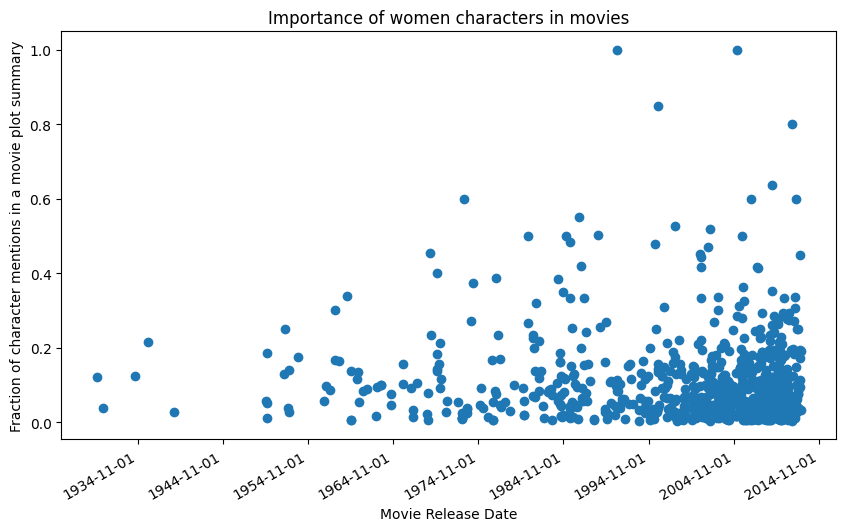

In [188]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# change movie release date to date

women = women.copy()


plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(women['movie_release_date'], women['character_occurrences'])
plt.xlabel('Movie Release Date')
plt.ylabel('Fraction of character mentions in a movie plot summary')
plt.title('Importance of women characters in movies')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Change format if needed
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=120))  # Adjust interval as needed

plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()

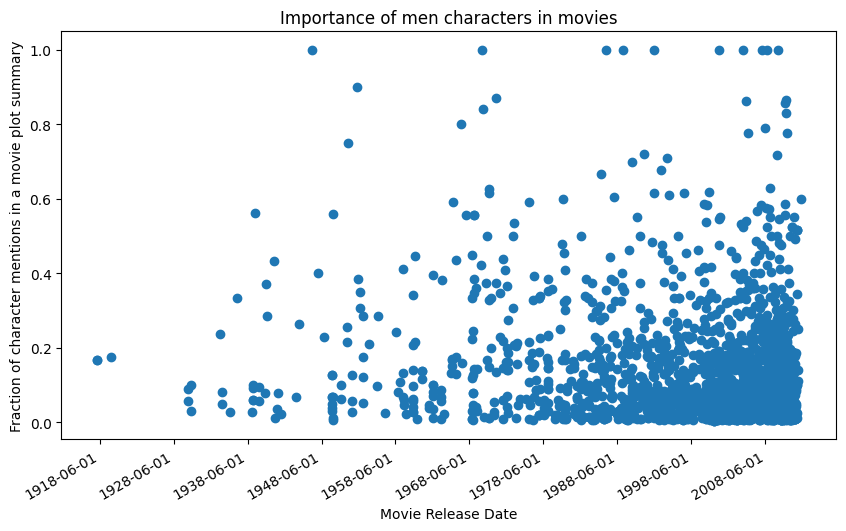

In [189]:
# same for men
men = men.copy()


plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(men['movie_release_date'], men['character_occurrences'])
plt.xlabel('Movie Release Date')
plt.title('Importance of men characters in movies')
plt.ylabel('Fraction of character mentions in a movie plot summary')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Change format if needed
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=120))  # Adjust interval as needed

plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()

### Mean in a year

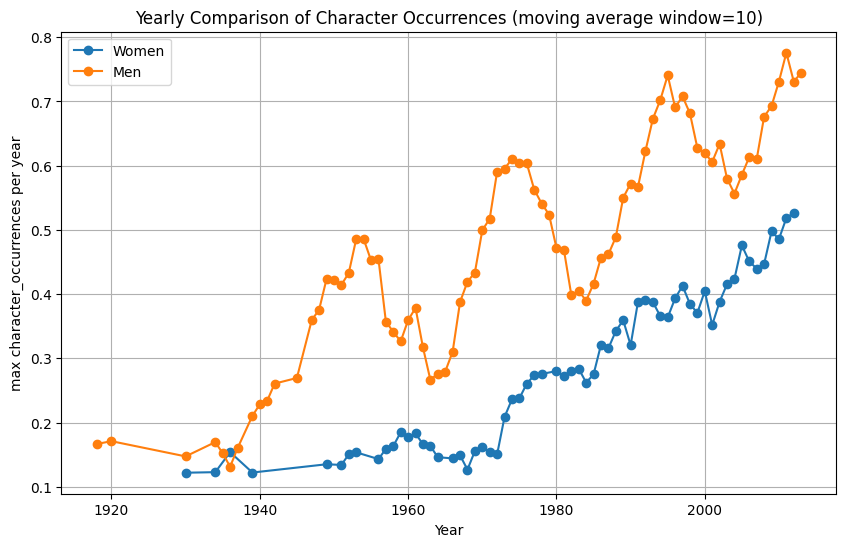

In [208]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_data(df, gender_label, agg_column, agg_func, window_size=1):
    yearly_agg = df.groupby('year')[agg_column].agg(agg_func).reset_index()
    if window_size > 1:
        yearly_agg[agg_column] = yearly_agg[agg_column].rolling(window=window_size, min_periods=1).mean()
    plt.plot(yearly_agg['year'], yearly_agg[agg_column], marker='o', label=gender_label)

def plot_gender_comparison(women_df, men_df, agg_column, agg_func,smoothing_window=1):
    """
    Plots a comparison between men and women dataframes for a given column and aggregation function.

    :param women_df: DataFrame for women.
    :param men_df: DataFrame for men.
    :param agg_column: The column to aggregate.
    :param agg_func: The aggregation function to use.
    :param plot_title: Title of the plot.
    :param y_axis_label: Y-axis label of the plot.
    """
    # Ensure that the date column is in datetime format
    women_df['movie_release_date'] = pd.to_datetime(women_df['movie_release_date'])
    men_df['movie_release_date'] = pd.to_datetime(men_df['movie_release_date'])

    # Extract year from movie_release_date
    women_df['year'] = women_df['movie_release_date'].dt.year
    men_df['year'] = men_df['movie_release_date'].dt.year

    # Setup the figure
    plt.figure(figsize=(10, 6))

    # Plot for Women
    plot_data(women_df, 'Women', agg_column, agg_func, smoothing_window)
    plot_data(men_df, 'Men', agg_column, agg_func, smoothing_window)

    # Formatting the plot
    plt.xlabel('Year')
    plt.ylabel(f'{agg_func} {agg_column} per year')
    plt.title(f'Yearly Comparison of Character Occurrences {"(moving average window=" + str(smoothing_window) + ")" if smoothing_window > 1 else ""}')
    plt.grid(True)
    plt.legend()

    # Show plot
    plt.show()

# Example usage:
plot_gender_comparison(women, men, 'character_occurrences', 'max',10)
